# Chapter 4: NumPy Basics: Arrays and Vectorized Computation

In [1]:
import numpy as np

In [10]:
# Array vs. List

my_arr = np.arange(1_000_000)

my_list = list(range(1_000_000))

In [15]:
%timeit my_arr*2

2.68 ms ± 404 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [16]:
%timeit [x*2 for x in my_list]

55.4 ms ± 1.61 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## 4.1 The NumPy ndarray: A Multidimensional Object

In [20]:
data = np.array([[2, 4, 6], [8, 10, 12]])

data

array([[ 2,  4,  6],
       [ 8, 10, 12]])

In [23]:
data * 4

array([[ 8, 16, 24],
       [32, 40, 48]])

In [24]:
data + data

array([[ 4,  8, 12],
       [16, 20, 24]])

In [25]:
data.shape

(2, 3)

In [26]:
data.dtype

dtype('int64')

### Creating ndarrays

In [35]:
list1 = [1.5, 3, 4.5, 6, 7.5, 10]

arr1 = np.array(list1)

arr1

array([ 1.5,  3. ,  4.5,  6. ,  7.5, 10. ])

In [41]:
# Nested sequences, like a list of equal-length lists, will be converted into a multidimensional array:

list2 = [[7, 14, 21], [28, 35, 42]]

arr2 = np.array(list2)

arr2

array([[ 7, 14, 21],
       [28, 35, 42]])

In [42]:
arr2.ndim

2

In [43]:
arr2.shape

(2, 3)

In [46]:
arr2.dtype

dtype('int64')

In [61]:
# np.zeros and np.ones create arrays of 0s and 1s:
# To create a higher dimensional array with these methods, pass a tuple for the shape:

np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [59]:
np.ones((5, 5))

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [73]:
# np.empty creates an array without initializing its values to any particular value:
# use only when you want to populate the new array with data:

emp = np.empty((3, 3, 3))

In [72]:
# numpy.arange is an array-valued version of the built-in Python range function:

np.arange(0, 11, 2)

array([ 0,  2,  4,  6,  8, 10])

In [76]:
# Produces a ones array of the same shape and data type:

np.ones_like(emp)

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

In [83]:
# Produce an array with all values set to the specified "fill value":

np.full((2, 3, 3), 69)

array([[[69, 69, 69],
        [69, 69, 69],
        [69, 69, 69]],

       [[69, 69, 69],
        [69, 69, 69],
        [69, 69, 69]]])

In [87]:
# Create a square N × N identity matrix (1s on the diagonal and 0s elsewhere)

np.identity(5), np.eye(5)

(array([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]]),
 array([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]]))

### Data Types for ndarrays

In [90]:
arr1 = np.array([1, 2, 3], dtype=np.float32)

arr1.dtype

dtype('float32')

In [91]:
arr2 = np.array([1, 2, 3], dtype=np.int32)

arr2.dtype

dtype('int32')

In [101]:
# Converting dtypes:

arr1 = np.array([1, 2, 3, 4, 5, 6])

arr1.dtype

dtype('int64')

In [102]:
float_arr1 = arr.astype(np.float64)

float_arr1.dtype

dtype('float64')

In [104]:
# the decimal part will be truncated:

arr2 = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])

arr2.astype(np.int64)

array([ 3, -1, -2,  0, 12, 10])

In [110]:
# If you have an array of strings representing numbers, you can use astype to convert them to numeric form:

numeric_strings = np.array(["5.7", "2.1", 3], dtype=np.str_)

numeric_strings.astype(np.float64)

array([5.7, 2.1, 3. ])

In [117]:
# You can also use another array’s dtype:

int_arr = np.arange(10)

calibers = np.array([.22, .270, .357, .380, .44, .50])

int_arr.astype(calibers.dtype)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [121]:
# There are shorthand type code strings you can also use to refer to a dtype:

zeros_unit32 = np.zeros((2, 3, 3), dtype="u4")

In [119]:
zeros_unit32

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint32)

In [126]:
# Unsigned integer can't represent minus values:

np.full((2, 2), -1, dtype="u4")

OverflowError: Python integer -1 out of bounds for uint32

### Arithmetic with NumPy Arrays

In [128]:
# Any arithmetic operations between equal-size arrays apply the operation element-wise:

arr = np.array([[1., 2., 3.], [4., 5., 6.]])

arr

array([[1., 2., 3.],
       [4., 5., 6.]])

In [129]:
arr * arr

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

In [130]:
arr - arr

array([[0., 0., 0.],
       [0., 0., 0.]])

In [131]:
1 / arr

array([[1.        , 0.5       , 0.33333333],
       [0.25      , 0.2       , 0.16666667]])

In [135]:
# Arithmetic operations with scalars propagate the scalar argument to each element in the array:

arr ** 2

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

In [139]:
# Comparisons between arrays of the same size yield Boolean arrays:

arr2 = np.array([[0., 4., 1.], [7., 2., 12.]])

arr2

array([[ 0.,  4.,  1.],
       [ 7.,  2., 12.]])

In [138]:
arr2 > arr

array([[False,  True, False],
       [ True, False,  True]])

### Basic Indexing and Slicing

In [4]:
arr = np.arange(11)

arr

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [12]:
arr[5]

np.int64(5)

In [19]:
# Array slices are views of the og array and not a copy.
# Any modifications to the view will be relfected on the og array.

arr[5:9]

array([   11, 12345,    13,    14])

In [14]:
arr[5:9] = [11, 12, 13, 14]

In [15]:
arr

array([ 0,  1,  2,  3,  4, 11, 12, 13, 14,  9, 10])

In [16]:
arr_slice = arr[5:9]

arr_slice

array([11, 12, 13, 14])

In [20]:
# This modification will also make changes to the og array:

arr_slice[1] = 12345

In [18]:
arr

array([    0,     1,     2,     3,     4,    11, 12345,    13,    14,
           9,    10])

In [21]:
# This assigns to all the values:

arr_slice[:] = 69

In [22]:
arr

array([ 0,  1,  2,  3,  4, 69, 69, 69, 69,  9, 10])

In [24]:
# Correct way to copy a slice of an array instead of just a view:

arr[5:8].copy()

array([69, 69, 69])

In [32]:
# Two-Dimensional Array:

arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [37]:
# Here axis 0 is "rows" and axis 1 is "columns"

arr2d[1,1:3]

array([5, 6])

In [43]:
# Three-Dimensional Array:

arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])

arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [39]:
# Here axis 0 is "stack", axis 1 is "rows" and axis 2 is "columns"

arr3d[1, 0, 0]

np.int64(7)

In [44]:
old_values = arr3d[0].copy()

arr3d[0] = 69

In [45]:
arr3d

array([[[69, 69, 69],
        [69, 69, 69]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [46]:
arr3d[0] = old_values

arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [49]:
# Indexing with slices:

arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [53]:
# Selecting the first two rows:

arr2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

In [56]:
# You can pass multiple slices just like you can pass multiple indexes:

arr2d[:2, 1:]

array([[2, 3],
       [5, 6]])

In [65]:
# Selecting the 2nd row and the 1st two columns which makes it a 1d array:

lower_dim_slice = arr2d[1,:2]
lower_dim_slice

array([4, 5])

In [69]:
arr2d[:2,2]

array([3, 6])

In [72]:
# A colon by itself means to take the entire axis:

arr2d[:, :1]

array([[1],
       [4],
       [7]])

### Boolean Indexing

In [73]:
names = np.array(["Bob", "Joe", "Will", "Bob", "Will", "Joe", "Joe"])

data = np.array([[4, 7], [0, 2], [-5, 6], [0, 0], [1, 2], [-12, -4], [3, 4]])

In [74]:
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [75]:
data

array([[  4,   7],
       [  0,   2],
       [ -5,   6],
       [  0,   0],
       [  1,   2],
       [-12,  -4],
       [  3,   4]])

In [88]:
# Suppose each name corresponds to a row in the data array and 
# we wanted to select all the rows with the corresponding name "Bob"
# The Boolean array must be of the same length as the array axis it’s indexing:

data[names == "Bob"]

array([[4, 7],
       [0, 0]])

In [78]:
# Trues only where there's a "Bob"

names == "Bob"

array([ True, False, False,  True, False, False, False])

In [81]:
# Selecting rows where there's "Bob" and indexing the columns:

data[names == "Bob", 1:]

array([[7],
       [0]])

In [84]:
data[names == "Bob", 1]

array([7, 0])

In [93]:
# To select everything but "Bob":

names != "Bob"

array([False,  True,  True, False,  True,  True,  True])

In [91]:
# Another way:

data[~(names == "Bob")]

array([[  0,   2],
       [ -5,   6],
       [  1,   2],
       [-12,  -4],
       [  3,   4]])

In [98]:
# The Python keywords "and" and "or" do not work with Boolean arrays. Use & (and) and | (or) instead.

data[(names == "Bob") | (names == "Joe")]

array([[  4,   7],
       [  0,   2],
       [  0,   0],
       [-12,  -4],
       [  3,   4]])

In [101]:
# Setting 0 where ever there's minus values:

data[data < 0] = 0

In [100]:
data

array([[4, 7],
       [0, 2],
       [0, 6],
       [0, 0],
       [1, 2],
       [0, 0],
       [3, 4]])

In [105]:
# Setting 7 where ever the corresponding "Joe" is in data:

data[names != "Joe"] = 7

In [103]:
data

array([[7, 7],
       [0, 2],
       [7, 7],
       [7, 7],
       [7, 7],
       [0, 0],
       [3, 4]])

### Fancy Indexing

In [3]:
# Fancy indexing is a term adopted by NumPy to describe indexing using integer arrays:

arr = np.zeros((8, 4))

arr

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [12]:
# Making each row an i:

for i in range(8):
    arr[i] = i

In [11]:
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

In [16]:
# To select a subset of the rows in a particular order, pass a list of integers specifying the desired order:

arr[[1, 7, 5]]

array([[1., 1., 1., 1.],
       [7., 7., 7., 7.],
       [5., 5., 5., 5.]])

In [18]:
# Negative indices selects rows from the end:

arr[[-7, -1, -3]]

array([[1., 1., 1., 1.],
       [7., 7., 7., 7.],
       [5., 5., 5., 5.]])

In [28]:
### Making a one-dimensional array and reshaping it to 8x5:

arr1 = np.arange(1, 41).reshape((8, 5))

arr1

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25],
       [26, 27, 28, 29, 30],
       [31, 32, 33, 34, 35],
       [36, 37, 38, 39, 40]])

In [30]:
# Passing multiple lists as index makes the 1st list as rows and 2nd as columns:

arr1[[1, 2, 4, 5, 6], [1, 3, 0, 2, 4]]

array([ 7, 14, 21, 28, 35])

In [33]:
arr1[[1, 2, 4, 5, 6]][:, [1, 3, 0, 2, 4]]

array([[ 0,  9,  6,  8, 10],
       [12,  0, 11, 13, 15],
       [22, 24,  0, 23, 25],
       [27, 29, 26,  0, 30],
       [32, 34, 31, 33,  0]])

In [32]:
# Makes changes to the og array:

arr1[[1, 2, 4, 5, 6], [1, 3, 0, 2, 4]] = 0

arr1

array([[ 1,  2,  3,  4,  5],
       [ 6,  0,  8,  9, 10],
       [11, 12, 13,  0, 15],
       [16, 17, 18, 19, 20],
       [ 0, 22, 23, 24, 25],
       [26, 27,  0, 29, 30],
       [31, 32, 33, 34,  0],
       [36, 37, 38, 39, 40]])

### Transposing Arrays and Swapping Axes

In [36]:
arr = np.arange(1, 16).reshape((3, 5))

arr

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15]])

In [43]:
# Arrays have the transpose method and the special T attribute:
# Also a view and not a copy:

arr.T

array([[ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14],
       [ 5, 10, 15]])

In [44]:
arr1 = np.array([[0, 1, 0], [1, 2, -2], [6, 3, 2], [-1, 0, -1], [1, 0, 1]])

arr1

array([[ 0,  1,  0],
       [ 1,  2, -2],
       [ 6,  3,  2],
       [-1,  0, -1],
       [ 1,  0,  1]])

In [48]:
# For matrix multiplication, the no. of columns of 1st matrix == no. rows of the 2nd matrix:
# Computing the inner matrix product using numpy.dot:

np.dot(arr1.T, arr1)

array([[39, 20, 12],
       [20, 14,  2],
       [12,  2, 10]])

In [49]:
# Another way:

arr1.T @ arr1

array([[39, 20, 12],
       [20, 14,  2],
       [12,  2, 10]])

In [50]:
# Another way:

np.matmul(arr1.T, arr1)

array([[39, 20, 12],
       [20, 14,  2],
       [12,  2, 10]])

In [52]:
arr1

array([[ 0,  1,  0],
       [ 1,  2, -2],
       [ 6,  3,  2],
       [-1,  0, -1],
       [ 1,  0,  1]])

In [54]:
# This method also returns a view without making a copy:

arr.swapaxes(0, 1)

array([[ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14],
       [ 5, 10, 15]])

## 4.2 Pseudorandom Number Generation

In [55]:
# 4×4 array of samples from the standard normal distribution:

np.random.standard_normal(size=(4,4))

array([[ 1.92020621,  0.36721892, -1.04653288,  1.1850436 ],
       [-1.41193332,  0.94231519,  1.05908916,  0.62708017],
       [ 0.74747436,  0.32796956, -0.14046924, -0.54684167],
       [ 0.79574056,  1.19640085, -0.94953727, -0.42564512]])

In [56]:
# numpy.random is again faster than bulit-in Python random:

from random import normalvariate

N = 1_000_000

In [58]:
%timeit [normalvariate(0, 1) for _ in range(N)]

992 ms ± 11.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [59]:
%timeit np.random.standard_normal(N)

42.1 ms ± 1.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [34]:
# These random numbers are not truly random (rather, pseudorandom) but instead are generated by a random number generator
# but your code can be configured to use an explicit generator:

rng = np.random.default_rng(seed=12345)

# Drawing samples from a standard normal distribution (there are sereval other distributions too):

data = rng.standard_normal((2, 3))

In [63]:
# Provides a better estimate at random than numpy:

data

array([[-1.42382504,  1.26372846, -0.87066174],
       [-0.25917323, -0.07534331, -0.74088465]])

In [92]:
type(rng)

numpy.random._generator.Generator

In [90]:
perm_arr = [1, 3, 5, 7, 9]

shuff_arr = [1, 3, 5, 7, 9]

In [104]:
# The permutation() returns a re-arranged array and leaves the original array un-changed:

rng.permutation(perm_arr)

array([1, 9, 7, 5, 3])

In [105]:
# The shuffle() method makes changes to the original array:

rng.shuffle(shuff_arr)

In [146]:
# Random integers:

rng.integers(7, 35, size=(5, 5))

array([[ 8, 34,  9, 25, 14],
       [11, 14, 32, 20, 11],
       [ 7, 16, 32,  8, 20],
       [17, 11, 27, 20, 10],
       [34, 28, 20, 18, 23]])

## 4.3 Universal Functions: Fast Element-Wise Array Functions

In [151]:
# ufunc is a function that performs element-wise operations on data in ndarrays:

arr = np.arange(1, 11)

arr

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [159]:
# Unary (single) ufuncs perform simple element-wise transformations:

np.square(arr)

array([  1,   4,   9,  16,  25,  36,  49,  64,  81, 100])

In [155]:
np.sqrt(arr)

array([1.        , 1.41421356, 1.73205081, 2.        , 2.23606798,
       2.44948974, 2.64575131, 2.82842712, 3.        , 3.16227766])

In [158]:
# Computes the exponential of all elements:

np.exp(arr)

array([2.71828183e+00, 7.38905610e+00, 2.00855369e+01, 5.45981500e+01,
       1.48413159e+02, 4.03428793e+02, 1.09663316e+03, 2.98095799e+03,
       8.10308393e+03, 2.20264658e+04])

In [163]:
# Binary (double) ufucns take two arrays and return a single array:

x = rng.standard_normal(8)

y = rng.standard_normal(8)

In [164]:
np.add(x, y)

array([-0.45131364,  1.08619096, -0.64608539, -1.34019998, -0.14230889,
        0.44858437,  0.68578851, -1.76697479])

In [165]:
np.subtract(x, y)

array([ 2.00603633,  0.57107543, -1.27189123, -1.0785766 , -2.68227513,
        0.63450929,  0.81809028,  0.44945415])

In [166]:
np.maximum(x, y)

array([ 0.77736134,  0.8286332 ,  0.31290292, -0.13081169,  1.26998312,
        0.54154683,  0.7519394 , -0.65876032])

In [173]:
# While not common, a ufunc can return multiple arrays:
# It returns the fractional and integral parts of a floating-point array:

arr = rng.standard_normal(7) * 5

arr

array([ 2.68360485,  3.09175007, -3.97508728,  1.50015473, -8.01350796,
        1.33399415, -6.30811891])

In [169]:
remainder, whole_part = np.modf(arr)

In [170]:
remainder

array([0.67978425, 0.73538882, 0.3057201 , 0.354573  , 0.16827269,
       0.3874183 , 0.65126193])

In [171]:
whole_part

array([0., 6., 0., 0., 2., 1., 2.])

In [179]:
arr

array([ 2.68360485,  3.09175007, -3.97508728,  1.50015473, -8.01350796,
        1.33399415, -6.30811891])

In [177]:
out = np.zeros_like(arr)

out

array([0., 0., 0., 0., 0., 0., 0.])

In [182]:
# The "out" argument helps assign the results into an existing array rather than create one:
 
np.add(arr, 1, out=out)

array([ 3.68360485,  4.09175007, -2.97508728,  2.50015473, -7.01350796,
        2.33399415, -5.30811891])

In [184]:
out

array([ 3.68360485,  4.09175007, -2.97508728,  2.50015473, -7.01350796,
        2.33399415, -5.30811891])

## 4.4 Array-Oriented Programming with Arrays

In [2]:
point = np.arange(1, 11)

In [8]:
np.meshgrid(point, point)

(array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
        [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
        [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
        [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
        [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
        [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
        [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
        [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
        [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
        [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]]),
 array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
        [ 2,  2,  2,  2,  2,  2,  2,  2,  2,  2],
        [ 3,  3,  3,  3,  3,  3,  3,  3,  3,  3],
        [ 4,  4,  4,  4,  4,  4,  4,  4,  4,  4],
        [ 5,  5,  5,  5,  5,  5,  5,  5,  5,  5],
        [ 6,  6,  6,  6,  6,  6,  6,  6,  6,  6],
        [ 7,  7,  7,  7,  7,  7,  7,  7,  7,  7],
        [ 8,  8,  8,  8,  8,  8,  8,  8,  8,  8],
        [ 9,  9,  9,  9,  9,  9,  9,  9,  9,  9],
        [10, 10, 10, 10, 10, 10, 10, 10, 10, 10]

In [6]:
point.ndim

1

In [4]:
points = np.arange(-5, 5, 0.1)    # 100 equally spaced points

points

array([-5.00000000e+00, -4.90000000e+00, -4.80000000e+00, -4.70000000e+00,
       -4.60000000e+00, -4.50000000e+00, -4.40000000e+00, -4.30000000e+00,
       -4.20000000e+00, -4.10000000e+00, -4.00000000e+00, -3.90000000e+00,
       -3.80000000e+00, -3.70000000e+00, -3.60000000e+00, -3.50000000e+00,
       -3.40000000e+00, -3.30000000e+00, -3.20000000e+00, -3.10000000e+00,
       -3.00000000e+00, -2.90000000e+00, -2.80000000e+00, -2.70000000e+00,
       -2.60000000e+00, -2.50000000e+00, -2.40000000e+00, -2.30000000e+00,
       -2.20000000e+00, -2.10000000e+00, -2.00000000e+00, -1.90000000e+00,
       -1.80000000e+00, -1.70000000e+00, -1.60000000e+00, -1.50000000e+00,
       -1.40000000e+00, -1.30000000e+00, -1.20000000e+00, -1.10000000e+00,
       -1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01,
       -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
       -2.00000000e-01, -1.00000000e-01, -1.77635684e-14,  1.00000000e-01,
        2.00000000e-01,  

In [9]:
xs, ys = np.meshgrid(points, points)

In [12]:
# xs contains the x-coordinates across the rows:

xs

array([[-5. , -4.9, -4.8, ...,  4.7,  4.8,  4.9],
       [-5. , -4.9, -4.8, ...,  4.7,  4.8,  4.9],
       [-5. , -4.9, -4.8, ...,  4.7,  4.8,  4.9],
       ...,
       [-5. , -4.9, -4.8, ...,  4.7,  4.8,  4.9],
       [-5. , -4.9, -4.8, ...,  4.7,  4.8,  4.9],
       [-5. , -4.9, -4.8, ...,  4.7,  4.8,  4.9]])

In [13]:
# ys contains the y-coordinates across the columns:

ys

array([[-5. , -5. , -5. , ..., -5. , -5. , -5. ],
       [-4.9, -4.9, -4.9, ..., -4.9, -4.9, -4.9],
       [-4.8, -4.8, -4.8, ..., -4.8, -4.8, -4.8],
       ...,
       [ 4.7,  4.7,  4.7, ...,  4.7,  4.7,  4.7],
       [ 4.8,  4.8,  4.8, ...,  4.8,  4.8,  4.8],
       [ 4.9,  4.9,  4.9, ...,  4.9,  4.9,  4.9]])

In [195]:
z = np.sqrt(xs ** 2 + ys ** 2)

z

array([[7.07106781, 7.00071425, 6.93108938, ..., 6.86221539, 6.93108938,
        7.00071425],
       [7.00071425, 6.92964646, 6.85930026, ..., 6.78969808, 6.85930026,
        6.92964646],
       [6.93108938, 6.85930026, 6.7882251 , ..., 6.71788657, 6.7882251 ,
        6.85930026],
       ...,
       [6.86221539, 6.78969808, 6.71788657, ..., 6.64680374, 6.71788657,
        6.78969808],
       [6.93108938, 6.85930026, 6.7882251 , ..., 6.71788657, 6.7882251 ,
        6.85930026],
       [7.00071425, 6.92964646, 6.85930026, ..., 6.78969808, 6.85930026,
        6.92964646]])

In [196]:
import matplotlib.pyplot as plt

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Saroj\AppData\Local\Temp\ipykernel_81068\482495642.py:3: SyntaxWarning: invalid escape sequence '\s'
  plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")


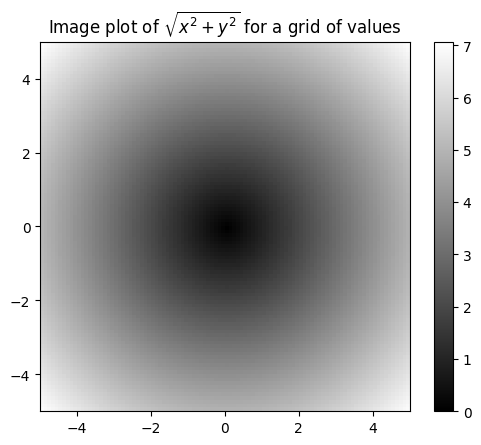

In [202]:
plt.imshow(z, cmap=plt.cm.gray, extent=[-5, 5, -5, 5])
plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")
plt.show()
plt.close("all")

### Expressing Conditional Logic as Array Operations

In [14]:
# The numpy.where function is a vectorized version of the ternary expression x if condition else y:

xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])

yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])

cond = np.array([True, False, True, True, False])

In [16]:
# Suppose we want to take values from "xarr" when there's a True and else (False) take values from "yarr":

np.where(cond, xarr, yarr)

array([1.1, 2.2, 1.3, 1.4, 2.5])

In [25]:
# The 2nd and 3rd arguments don’t need to be arrays; one or both of them can be scalars:

# Suppose we want to replace all the +ve values with 2 and -ve values with -2:

arr = rng.standard_normal((4, 4))

arr

array([[-1.06364272,  1.3017145 ,  0.74787294,  0.98087591],
       [-0.11041869,  0.46791853,  0.89060715,  1.02300937],
       [ 0.31238339, -0.06190469, -0.35947965, -0.74864398],
       [-0.96547891,  0.36003466, -0.24455253, -1.99585661]])

In [31]:
np.where(arr > 0, 2, -2)

array([[-2,  2,  2,  2],
       [-2,  2,  2,  2],
       [ 2, -2, -2, -2],
       [-2,  2, -2, -2]])

In [32]:
# You can combine scalars and arrays when using numpy.where

# You can also set only positve values to 2 and leave the rest:

np.where(arr > 0, 2, arr)

array([[-1.06364272,  2.        ,  2.        ,  2.        ],
       [-0.11041869,  2.        ,  2.        ,  2.        ],
       [ 2.        , -0.06190469, -0.35947965, -0.74864398],
       [-0.96547891,  2.        , -0.24455253, -1.99585661]])

### Mathematical and Statistical Methods

In [43]:
arr = rng.standard_normal((5,4))

arr

array([[-2.17088985,  0.62848817,  0.60119653,  0.95075786],
       [-0.86924667, -0.52900707,  0.0456841 , -1.02755181],
       [-1.2292893 , -0.88335847, -0.07089346,  0.37405335],
       [-0.02459374,  0.07726066, -0.68391322, -0.72083767],
       [ 1.12062282, -0.05481416, -0.08241372,  0.9359865 ]])

In [44]:
arr.sum()

np.float64(-3.612759162940142)

In [45]:
arr.std()

np.float64(0.8181051809221832)

In [46]:
arr.mean()

np.float64(-0.1806379581470071)

In [47]:
np.median(arr)

np.float64(-0.06285381198142043)

In [50]:
# Axis 1 meaning by rows and Axis 0 meaning by columns:

arr.mean(axis=1)

array([ 0.00238818, -0.59503036, -0.45237197, -0.33802099,  0.47984536])

In [51]:
arr.sum(axis=0)

array([-3.17339674, -0.76143087, -0.19033978,  0.51240823])

In [57]:
arr1 = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [60]:
# cumsum and cumprod do not aggregate, instead producing an array of the intermediate results:

arr1.cumsum()

array([ 1,  3,  6, 10, 15, 21, 28, 36, 45])

In [59]:
arr1.cumprod()

array([     1,      2,      6,     24,    120,    720,   5040,  40320,
       362880])

In [62]:
# cumsum in 2d arrays:

arr2 = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

arr2

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [66]:
# By columns:

arr2.cumsum(axis=0)

array([[ 1,  2,  3],
       [ 5,  7,  9],
       [12, 15, 18]])

In [67]:
# By rows:

arr2.cumsum(axis=1)

array([[ 1,  3,  6],
       [ 4,  9, 15],
       [ 7, 15, 24]])

### Methods for Boolean Arrays

In [68]:
arr = rng.standard_normal(100)
arr

array([ 1.23853712,  1.27279553,  0.40589222, -0.05032522,  0.28931754,
        0.17930568,  1.39748056,  0.29204679,  0.63840567, -0.02788771,
        1.37105185, -2.05280763,  0.38050908,  0.75539067, -1.15912585,
        2.15031011, -0.15027022, -0.16116428, -1.07944248,  0.87796618,
        0.22446741, -0.59159345,  0.2262628 ,  0.68618251,  1.21500461,
        0.21605944, -0.96482356, -0.5566078 , -2.29838764, -0.73208213,
        0.7364691 ,  0.46571672, -0.10787605, -0.34143629,  1.58453379,
        0.28224121,  0.90954639,  0.39507157, -0.66937652,  1.55536898,
       -1.23813903, -1.19617346, -0.42914951, -0.72965989, -0.5574689 ,
       -0.59995306,  0.9868272 ,  0.05419468,  0.35190744, -1.58796951,
       -0.84695135,  1.08457026, -1.20382665,  1.17853089, -1.03066585,
        0.29921833, -0.84623997,  0.1966203 , -0.89963782, -0.25660543,
        1.67254777, -0.37526965,  2.03679478, -0.4587934 , -1.17576966,
        0.0750525 , -0.40899022,  1.75653198,  0.86092307,  1.18

In [73]:
# The parentheses here are necessary:

(arr > 0).sum()

np.int64(56)

In [74]:
(arr <= 0).sum()

np.int64(44)

In [86]:
bools = np.array([True, True, True, True, True])


In [87]:
# any checks whether one or more value is True:

bools.any()

np.True_

In [88]:
# all checks whether all values are True:

bools.all()

np.True_

In [ ]:
# These methods also work with non-Boolean arrays, where nonzero elements are treated as True.

### Sorting

In [93]:
arr = rng.standard_normal(10)

arr

array([-0.63763575,  1.14449564, -1.64090191, -1.31400358, -0.51035251,
       -0.09986088, -0.12950676, -1.39670506,  0.19380935, -0.12929273])

In [95]:
arr.sort()

In [96]:
arr

array([-1.64090191, -1.39670506, -1.31400358, -0.63763575, -0.51035251,
       -0.12950676, -0.12929273, -0.09986088,  0.19380935,  1.14449564])

In [105]:
arr2d = rng.standard_normal((5, 3))

arr2d

array([[-0.63090634,  0.70950138,  0.05969517],
       [-0.77247575, -0.90623909,  1.16547928],
       [ 0.6310474 ,  1.97551858, -0.5266552 ],
       [-0.74354059,  0.40389057,  1.37940685],
       [ 0.5967524 ,  0.43315307,  1.88698807]])

In [106]:
# By each row:

arr2d.sort(axis=1)

arr2d

array([[-0.63090634,  0.05969517,  0.70950138],
       [-0.90623909, -0.77247575,  1.16547928],
       [-0.5266552 ,  0.6310474 ,  1.97551858],
       [-0.74354059,  0.40389057,  1.37940685],
       [ 0.43315307,  0.5967524 ,  1.88698807]])

In [104]:
# By each column:

arr2d.sort(axis=0)

arr2d

array([[-1.63251948, -1.77110716, -0.22310006],
       [-1.20221832, -0.84569363, -0.01560552],
       [-0.71044661,  0.36998768,  0.07226048],
       [-0.00734697,  0.42375063,  0.32999736],
       [ 0.47109807,  0.83107567,  1.60083585]])

In [107]:
arr3 = np.array([5, -10, 7, 1, 0, -3])

In [110]:
# Returns a copy instead of making changes to the og array:

np.sort(arr3)

array([-10,  -3,   0,   1,   5,   7])

In [109]:
arr3

array([  5, -10,   7,   1,   0,  -3])

### Unique and Other Set Logic

In [113]:
# numpy.unique() similar to set sequence and it also sorts the array:

names = np.array(["Bob", "Will", "Joe", "Bob", "Will", "Joe", "Joe"])

np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [112]:
arr = np.array([2, 1, 2, 3, 1, 2, 4, 1, 5, 5, 3])

np.unique(arr)

array([1, 2, 3, 4, 5])

In [117]:
# Checks if the given list of elements are in the array:

values = np.array([6, 0, 0, 3, 2, 5, 6])

np.isin(values, [2, 3, 5])

array([False, False, False,  True,  True,  True, False])

In [120]:
np.isin(names, "Bob")

array([ True, False, False,  True, False, False, False])

In [122]:
# Elements in x that are not in y:

np.setdiff1d(arr, values)     # 1 & 4 are not in the values array

array([1, 4])

In [123]:
# A sorted union of arrays:

np.union1d(arr, values)

array([0, 1, 2, 3, 4, 5, 6])

## 4.5 File Input and Output with Arrays

In [3]:
arr = np.arange(1, 11)
arr

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [6]:
# Extention will be written if not present:

np.save("some_array", arr)

In [7]:
np.load("some_array.npy")

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [16]:
# You can save multiple arrays in an uncompressed archive:

np.savez("array_archive.npz", a=arr, b=arr)

In [9]:
arch = np.load("array_archive.npz")

In [15]:
arch["b"]

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [17]:
# If your data compresses well, you may wish to use numpy.savez_compressed instead:

np.savez_compressed("array_compressed", a=arr, b=arr)

In [20]:
np.load("array_compressed.npz")["a"]

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

## 4.6 Linear Algebra

In [21]:
# Multiplying two 2d arrays with * is an element-wise product:
# While matrix multiplication require using dot or @ or np.matmul()

x = np.array([[1., 2., 3.], [4., 5., 6.]])

y = np.array([[6., 23.], [-1, 7], [8, 9]])

In [22]:
x

array([[1., 2., 3.],
       [4., 5., 6.]])

In [23]:
y

array([[ 6., 23.],
       [-1.,  7.],
       [ 8.,  9.]])

In [30]:
# Matrix multiplication ways:

x.dot(y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [25]:
np.dot(x, y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [26]:
x @ y

array([[ 28.,  64.],
       [ 67., 181.]])

In [27]:
np.matmul(x, y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [32]:
# A matrix multiplication between a 2d array and an 1d array results is a 1d array:

x @ np.ones(3)

array([ 6., 15.])

In [40]:
# numpy.linalg has a standard set of matrix decompositions and things like inverse and determinant:

from numpy.linalg import inv, qr

In [43]:
X = rng.standard_normal((5, 5))

In [48]:
# Computing the dot product of "X" with its transpose "X.T"

mat = X.T @ X

mat

array([[ 1.36463897, -1.1258452 , -1.75662358, -0.78672755,  0.66734907],
       [-1.1258452 ,  5.06226697,  2.21809413,  1.52410124, -1.97027229],
       [-1.75662358,  2.21809413,  3.27271226,  1.7339216 , -1.3365612 ],
       [-0.78672755,  1.52410124,  1.7339216 ,  2.4526663 , -1.07176893],
       [ 0.66734907, -1.97027229, -1.3365612 , -1.07176893,  2.43942952]])

In [45]:
X

array([[ 0.8286332 , -0.95898831, -1.20938829, -1.41229201,  0.54154683],
       [ 0.7519394 , -0.65876032, -1.22867499,  0.25755777,  0.31290292],
       [-0.13081169,  1.26998312, -0.09296246, -0.06615089, -1.10821447],
       [ 0.13595685,  1.34707776,  0.06114402,  0.0709146 ,  0.43365454],
       [ 0.27748366,  0.53025239,  0.53672097,  0.61835001, -0.79501746]])

In [46]:
inv(mat)

array([[ 2.45133861, -0.01940269,  1.4515668 , -0.22299954,  0.01105864],
       [-0.01940269,  0.3395557 , -0.14848414, -0.03173504,  0.18426225],
       [ 1.4515668 , -0.14848414,  1.44763667, -0.42681217,  0.08860884],
       [-0.22299954, -0.03173504, -0.42681217,  0.70656895,  0.11195647],
       [ 0.01105864,  0.18426225,  0.08860884,  0.11195647,  0.65346813]])

In [58]:
inv_arr = mat @ inv(mat)

np.around(inv_arr, 2)

array([[ 1.,  0., -0.,  0., -0.],
       [-0.,  1., -0.,  0., -0.],
       [-0., -0.,  1., -0.,  0.],
       [-0., -0.,  0.,  1.,  0.],
       [ 0.,  0., -0.,  0.,  1.]])

## 4.7 Example: Random Walks

In [59]:
# A simple random walk starting at 0 with steps of 1 and –1 occurring with equal probability.

In [74]:
# Python way:

import random

position = 0
walk = [position]

for _ in range(1000):
    step = 1 if random.randint(0, 1) else -1     # +1 if the random no. is 1, -1 if it's 0
    position += step
    walk.append(position)

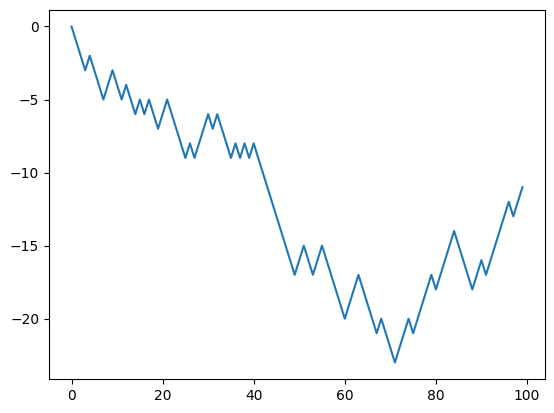

In [75]:
import matplotlib.pyplot as plt

plt.plot(walk[:100])
plt.show()

In [218]:
# NumPy way:

flips = rng.integers(0, 2, size=(1000))

In [219]:
steps = np.where(flips == 0, 1, -1)

In [220]:
# This gives us the complete steps taken along the way:

walk = steps.cumsum()

walk

array([ 1,  0,  1,  2,  3,  2,  1,  2,  3,  2,  3,  4,  3,  4,  5,  4,  3,
        2,  1,  2,  3,  4,  3,  2,  1,  0,  1,  0, -1, -2, -1, -2, -3, -4,
       -5, -6, -5, -6, -5, -4, -5, -4, -5, -6, -7, -8, -9, -8, -7, -6, -5,
       -4, -3, -2, -1,  0,  1,  0, -1,  0,  1,  2,  1,  0,  1,  0,  1,  2,
        3,  4,  5,  6,  5,  4,  5,  4,  5,  4,  3,  2,  3,  4,  3,  4,  5,
        6,  7,  8,  7,  8,  9, 10,  9,  8,  9,  8,  7,  6,  7,  6,  5,  4,
        3,  2,  3,  4,  5,  6,  5,  4,  3,  2,  1,  2,  1,  2,  3,  2,  1,
        2,  1,  0,  1,  2,  3,  2,  1,  0, -1,  0,  1,  2,  3,  4,  5,  6,
        5,  4,  3,  2,  1,  2,  3,  4,  3,  2,  3,  4,  5,  6,  5,  4,  3,
        2,  1,  2,  3,  4,  5,  6,  7,  8,  9,  8,  9, 10, 11, 12, 13, 14,
       15, 14, 13, 14, 13, 12, 13, 12, 13, 12, 13, 12, 13, 12, 13, 14, 13,
       14, 15, 14, 13, 14, 13, 12, 13, 14, 13, 14, 15, 14, 13, 12, 11, 12,
       13, 12, 13, 14, 15, 16, 17, 18, 19, 20, 19, 18, 17, 16, 15, 14, 15,
       14, 13, 12, 11, 12

In [222]:
# The lowest walk behind:

walk.min()

np.int64(-9)

In [223]:
# The highest walk ahead:

walk.max()

np.int64(36)

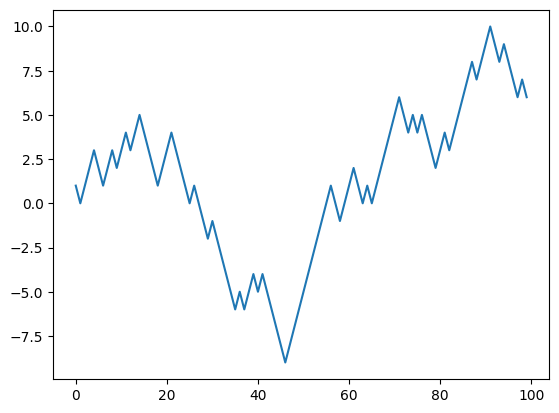

In [224]:
# Plot of 100 random steps taken:

plt.plot(walk[:100])
plt.show()

In [225]:
# The random walk of 10 steps ahead or behind reached at index 13:

(np.abs(walk) >= 9).argmax()

np.int64(46)

### Simulating Many Random Walks at Once

In [236]:
# Creating a matrix of 5000 rows and 1000 columns
# So the steps would be the cumulative sum of each row of 1000 elements

nwalks = 5000
nsteps = 1000

draws = rng.integers(0, 2, size=(nwalks, nsteps))     # 0 or 1

In [231]:
steps = np.where(draws > 0, 1, -1)

In [237]:
# Calculating 5000 walks of 1000 steps:

walks = steps.cumsum(axis=1)

In [238]:
# Minimum of all 5000 walks:

walks.min()

np.int64(-126)

In [239]:
# Maximum of all 5000 walks:

walks.max()

np.int64(116)

In [240]:
hits30 = (np.abs(walks) >= 30).any(axis=1)

hits30

array([ True, False,  True, ..., False,  True,  True])

In [242]:
# These many walks hit 30

hits30.sum()

np.int64(3397)

In [249]:
# Calculating the indexes of only the walks that hit 30:

crossing_times = (np.abs(walks[hits30]) >= 30).argmax(axis=1)

In [250]:
crossing_times

array([297, 325, 343, ..., 251, 619, 693])

In [253]:
# The average crossing time (trails) for 30 steps:

crossing_times.mean()

np.float64(502.32293199882247)